# Examining socio-demographic factors that influence in European voters

## Leave or remain in the European Union? 

<img src='https://www.irishtimes.com/polopoly_fs/1.3657023.1539082433!/image/image.jpg' style='height:400px'/>

Photo: The Irish Times — [BREXIT: THE FACTS](https://www.irishtimes.com/news/world/brexit/brexit-the-facts)

<div class="list-group" id="list-tab" role="tablist">
  <h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">&nbsp;Table of Contents:</h1>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="profile">1. Introduction<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages">2. Data Cleaning & Wrangling<span class="badge badge-primary badge-pill">2</span></a>
   <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="messages">3. Survey Weights<span class="badge badge-primary badge-pill">3</span></a>
   <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="messages">4. Data Exploration<span class="badge badge-primary badge-pill">4</span></a>    <a class="list-group-item list-group-item-action" data-toggle="list" href="#5" role="tab" aria-controls="messages">5. Previous Iterations<span class="badge badge-primary badge-pill">5</span></a>
</div>

<a id="1"></a> <br>
<font size="+3" color="black"><b>1 - Introduction</b></font><br><a id="1"></a>
<br> 

This report will investigated a dataset provided by [European Social Survey](https://www.europeansocialsurvey.org/) (ESS) which is a biennial cross-national survey of attitudes and behaviour from European citizens.

The study will focus on which aspects can influence for a person to vote for your country leave or remain a member of the European Union. After analyzing each variable individually I will build a model that after been trained can predict the probability on a person to vote for your country to Leave the European Union.



## Data Dictionary

- __CNTRY__ Country
- __EDUYRS__ Years of full-time education completed
- __EISCED__ Highest level of education, ES - ISCED
- __NETUSOFT__ Internet use, how often
- __UEMP3M__ Ever unemployed and seeking work for a period more than three months
- __MBTRU__ Member of trade union or similar organisation
- __VTEURMMB__ Would vote for your country to remain member of European Union or leave
- __GNDR__ Gender
- __YRBRN__  Year of birth
- __AGEA__ Age of respondent. Calculation based on year of birth and year of interview

__Questions__

**EDUYR** About how many years of education have you completed, whether full-time or part-time? Please report these in full-time equivalents and include compulsory years of schooling.
<br>**EISCED** Generated variable: Highest level of education, ES - ISCED 9 (What is the highest level of education you have successfully completed?)
<br>**NETUSOFT** People can use the internet on different devices such as computers, tablets and smartphones. How often do you use the internet on these or any other devices, whether for work or personal use?
<br>**UEMP3M** Have you ever been unemployed and seeking work for a period of more than three months?
<br>**MBTRU** Are you or have you ever been a member of a trade union or similar organisation? IF YES, is that currently or previously?
<br>**VTEURMMB** Imagine there were a referendum in [country] tomorrow about membership of the European Union. Would you vote for [country] to remain a member of the European Union or to leave the European Union?
<br>**YRBRN** And in what year were you born?

### International Standard Classification of Education (ISCED)

ISCED is the reference international classification for organising education programmes and related qualifications by levels and fields. ISCED 2011 (levels of education) has been implemented in all EU data collections
since 2014.

__Levels__

- ISCED 0: Early childhood education (‘less than primary’ for educational attainment)
- ISCED 1: Primary education
- ISCED 2: Lower secondary education
- ISCED 3: Upper secondary education
- ISCED 4: Post-secondary non-tertiary education
- ISCED 5: Short-cycle tertiary education
- ISCED 6: Bachelor’s or equivalent level
- ISCED 7: Master’s or equivalent level
- ISCED 8: Doctoral or equivalent level

More info about ISCED can be found [here](https://ec.europa.eu/eurostat/statistics-explained/index.php/International_Standard_Classification_of_Education_(ISCED)).

### Notebook settings

In [2]:
# Change the default plots size 
options(repr.plot.width=15, repr.plot.height=10)
options(warn=-1)

### Libraries

In [3]:
# Check if the packages that we need are installed
want = c("dplyr", "ggplot2", "ggthemes", "gghighlight", "foreign", "scales", "survey", "srvyr", "caret")
have = want %in% rownames(installed.packages())
# Install the packages that we miss
if ( any(!have) ) { install.packages( want[!have] ) }
# Load the packages
junk <- lapply(want, library, character.only = T)
# Remove the objects we created
rm(have, want, junk)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: grid

Loading required package: Matrix

Loading required package: survival


Attaching package: ‘survey’


The following object is masked from ‘package:graphics’:

    dotchart



Attaching package: ‘srvyr’


The following object is masked from ‘package:stats’:

    filter


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:survival’:

    cluster




## Data Extraction

__Selecting the variables which will be used for the data analysis__

In [4]:
survey_rawdata <- read.spss("ESS9e03_1.sav", use.value.labels=T, max.value.labels=Inf, to.data.frame=TRUE)

In [5]:
variables <- c("cntry", 
               "eduyrs", 
               "eisced", 
               "netusoft", 
               "uemp3m", 
               "mbtru", 
               "vteurmmb", 
               "yrbrn", 
               "agea", 
               "gndr", 
               "anweight", 
               "psu", 
               "stratum")

In [6]:
european_survey <- survey_rawdata[,variables]

In [7]:
head(european_survey)

,cntry,eduyrs,eisced,netusoft,uemp3m,mbtru,vteurmmb,yrbrn,agea,gndr,anweight,psu,stratum
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,Austria,12,"ES-ISCED IIIb, lower tier upper secondary",Every day,No,No,Remain member of the European Union,1975,43,Male,0.06588958,1688,59
2,Austria,12,"ES-ISCED IIIb, lower tier upper secondary",Every day,No,"Yes, previously",Remain member of the European Union,1951,67,Male,0.12490674,88,79
3,Austria,12,"ES-ISCED II, lower secondary",Most days,No,No,Leave the European Union,1978,40,Female,0.68583600,938,11
4,Austria,11,"ES-ISCED IIIb, lower tier upper secondary",Every day,No,No,Remain member of the European Union,1955,63,Male,0.11675334,1998,74
5,Austria,8,"ES-ISCED II, lower secondary",Never,No,No,Remain member of the European Union,1947,71,Female,0.31178924,601,99
6,Austria,13,"ES-ISCED IIIb, lower tier upper secondary",Only occasionally,No,"Yes, previously",Remain member of the European Union,1954,64,Male,0.17386711,68,77


In [8]:
paste0("Number of rows in the dataset: ", nrow(european_survey))

[1] "Number of rows in the dataset: 49519"

<a id="2"></a> <br>
<font size="+3" color="black"><b>2 - Data Cleaning & Wrangling</b></font><br><a id="2"></a>
<br> 

In [9]:
# Checking for NA's in the dataset
sapply(european_survey, function(x) sum(is.na(x)))

cntry   eduyrs   eisced netusoft   uemp3m    mbtru vteurmmb    yrbrn 
       0      708      107       47      295      331    13648      222 
    agea     gndr anweight      psu  stratum 
     222        0        0        0        0

In [10]:
# For the purpose of this analysis, considering Vote as Leave or Remain
european_survey$vteurmmb <- as.character(european_survey$vteurmmb)
european_survey$vteurmmb[european_survey$vteurmmb == "Remain member of the European Union"] <- "Remain"
european_survey$vteurmmb[european_survey$vteurmmb == "Leave the European Union"] <- "Leave"
european_survey$vteurmmb[european_survey$vteurmmb == "Would submit a blank ballot paper"] <- NA
european_survey$vteurmmb[european_survey$vteurmmb == "Would spoil the ballot paper"] <- NA
european_survey$vteurmmb[european_survey$vteurmmb == "Would not vote"] <- NA
european_survey$vteurmmb[european_survey$vteurmmb == "Not eligible to vote"] <- NA
european_survey$vteurmmb <- as.factor(european_survey$vteurmmb)

__Aggregation Levels for variable EISCED__

| Level            | ISCED      |
| :-----------:    |:----------:|
| Low education    | Levels 0-2 |
| Medium education | Levels 3-4 |
| High education   | Levels 5-8 |

In [11]:
# Cleaning responses that are not able to fit into ISCED
european_survey$eisced <- as.character(european_survey$eisced)
european_survey$eisced[european_survey$eisced == "Not possible to harmonise into ES-ISCED"] <- NA
european_survey$eisced[european_survey$eisced == "Other"] <- NA

In [12]:
# Creating a new feature Education by aggregating the ISCED"s levels
# Low, Medium and High Education
european_survey <- european_survey %>% 
  mutate(Education = case_when(
      eisced == "ES-ISCED I , less than lower secondary" ~ "Low Education",
      eisced == "ES-ISCED II, lower secondary" ~ "Low Education",
      eisced == "ES-ISCED IIIb, lower tier upper secondary" ~ "Medium Education",
      eisced == "ES-ISCED IIIa, upper tier upper secondary" ~ "Medium Education",
      eisced == "ES-ISCED IV, advanced vocational, sub-degree" ~ "Medium Education",
      eisced == "ES-ISCED V1, lower tertiary education, BA level" ~ "High Education",
      eisced == "ES-ISCED V2, higher tertiary education, >= MA level" ~ "High Education",
      TRUE ~ eisced))
european_survey$Education <- as.factor(european_survey$Education)
european_survey$eisced <- as.factor(european_survey$eisced)

In [13]:
# Cleaning NA values
df_european_survey <- european_survey[complete.cases(european_survey), ]
sapply(df_european_survey, function(x) sum(is.na(x)))

cntry    eduyrs    eisced  netusoft    uemp3m     mbtru  vteurmmb     yrbrn 
        0         0         0         0         0         0         0         0 
     agea      gndr  anweight       psu   stratum Education 
        0         0         0         0         0         0

In [14]:
# Different way to clean the variable leaving as yes or no
df_european_survey$uemp3m <- as.character(df_european_survey$uemp3m)
df_european_survey$uemp3m <- as.factor(df_european_survey$uemp3m)

In [15]:
# For the purpose of this analysis, considering the answer if the respondent ever been a member 
# of a trade union or similar organisation - "Yes, currently" and "Yes, previously" as simple Yes
df_european_survey$mbtru <- as.character(df_european_survey$mbtru)
df_european_survey$mbtru[df_european_survey$mbtru == "Yes, currently"] <- "Yes"
df_european_survey$mbtru[df_european_survey$mbtru == "Yes, previously"] <- "Yes"
df_european_survey$mbtru <- as.factor(df_european_survey$mbtru)


In [16]:
# Transforming as numeric the variable Years of Education
df_european_survey$eduyrs <- as.numeric(df_european_survey$eduyrs)

In [17]:
# Creating a new feature as per age (eg. young, young adult, older adult, elderly)
df_european_survey$agea <- as.numeric(df_european_survey$agea)
df_european_survey <- df_european_survey %>% 
  mutate(Age_Band = case_when(
    agea < 20 ~ "<20",
    agea >= 20 & agea < 40 ~ "20-39",
    agea >= 40 & agea <= 65 ~ "40-65",
    agea > 65 ~ ">65"))
df_european_survey$Age_Band <- as.factor(df_european_survey$Age_Band)

In [18]:
head(df_european_survey)

,cntry,eduyrs,eisced,netusoft,uemp3m,mbtru,vteurmmb,yrbrn,agea,gndr,anweight,psu,stratum,Education,Age_Band
,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,Austria,13,"ES-ISCED IIIb, lower tier upper secondary",Every day,No,No,Remain,1975,29,Male,0.06588958,1688,59,Medium Education,20-39
2,Austria,13,"ES-ISCED IIIb, lower tier upper secondary",Every day,No,Yes,Remain,1951,53,Male,0.12490674,88,79,Medium Education,40-65
3,Austria,13,"ES-ISCED II, lower secondary",Most days,No,No,Leave,1978,26,Female,0.68583600,938,11,Low Education,20-39
4,Austria,12,"ES-ISCED IIIb, lower tier upper secondary",Every day,No,No,Remain,1955,49,Male,0.11675334,1998,74,Medium Education,40-65
5,Austria,9,"ES-ISCED II, lower secondary",Never,No,No,Remain,1947,57,Female,0.31178924,601,99,Low Education,40-65
6,Austria,14,"ES-ISCED IIIb, lower tier upper secondary",Only occasionally,No,Yes,Remain,1954,50,Male,0.17386711,68,77,Medium Education,40-65


<a id="3"></a> <br>
<font size="+3" color="black"><b>3 - Survey Weights</b></font><br><a id="3"></a>
<br> 

The analysis of survey data often uses complex sample designs and __weighting adjustments__ in order to make the sample look more like the intended population of the survey. As ESS is a __cross-national survey__ and countries implement different sample designs, it is important to take weights in consideration to take into consideration the country context to __avoid the estimates be biased__.

__Post-stratification weights__ is intended purpose is to decrease the impact of coverage, sampling and nonresponse error. In ESS is based on gender, age, education and geographical region.

__Clustering__ produces more precise population estimates than a simple random design would achieve but this makes survey results appear more homogeneous. To address this problem ESS uses Clustering Adjustments.

According to ESS documentation:

> It is recommended that by default you should always use *anweight* (analysis 
weight) as a weight in all analysis. This weight is suitable for all types of analysis, 
including when you are studying just one country, when you compare across 
countries, or when you are studying groups of countries. 

> *anweight* corrects for differential selection probabilities within each country as 
specified by sample design, for nonresponse, for noncoverage, and for sampling 
error related to the four post-stratification variables, and takes into account 
differences in population size across countries. 

The clustering variable is called _psu_, stratification is indicated by _stratum_, and weighting by _anweight_.

Details about how ESS weights the data can be found [here](https://www.europeansocialsurvey.org/docs/methodology/ESS_weighting_data_1_1.pdf).

In [19]:
#library(survey)
#library(srvyr)
weighted_df_ess <- df_european_survey %>% as_survey_design(ids=psu, strata=stratum, weights=anweight)

In [20]:
options(survey.adjust.domain.lonely=TRUE)
options(survey.lonely.psu="adjust")

In [21]:
weighted_df_ess

Stratified 1 - level Cluster Sampling design (with replacement)
With (16277) clusters.
Called via srvyr
Sampling variables:
 - ids: psu
 - strata: stratum
 - weights: anweight
Data variables: cntry (fct), eduyrs (dbl), eisced (fct), netusoft (fct), uemp3m
  (fct), mbtru (fct), vteurmmb (fct), yrbrn (fct), agea (dbl), gndr (fct),
  anweight (dbl), psu (dbl), stratum (dbl), Education (fct), Age_Band (fct)

<a id="4"></a> <br>
<font size="+3" color="black"><b>4 - Data Exploration</b></font><br><a id="4"></a>
<br> 

### Top 10 countries with the highest proportion of votes to Leave the UE

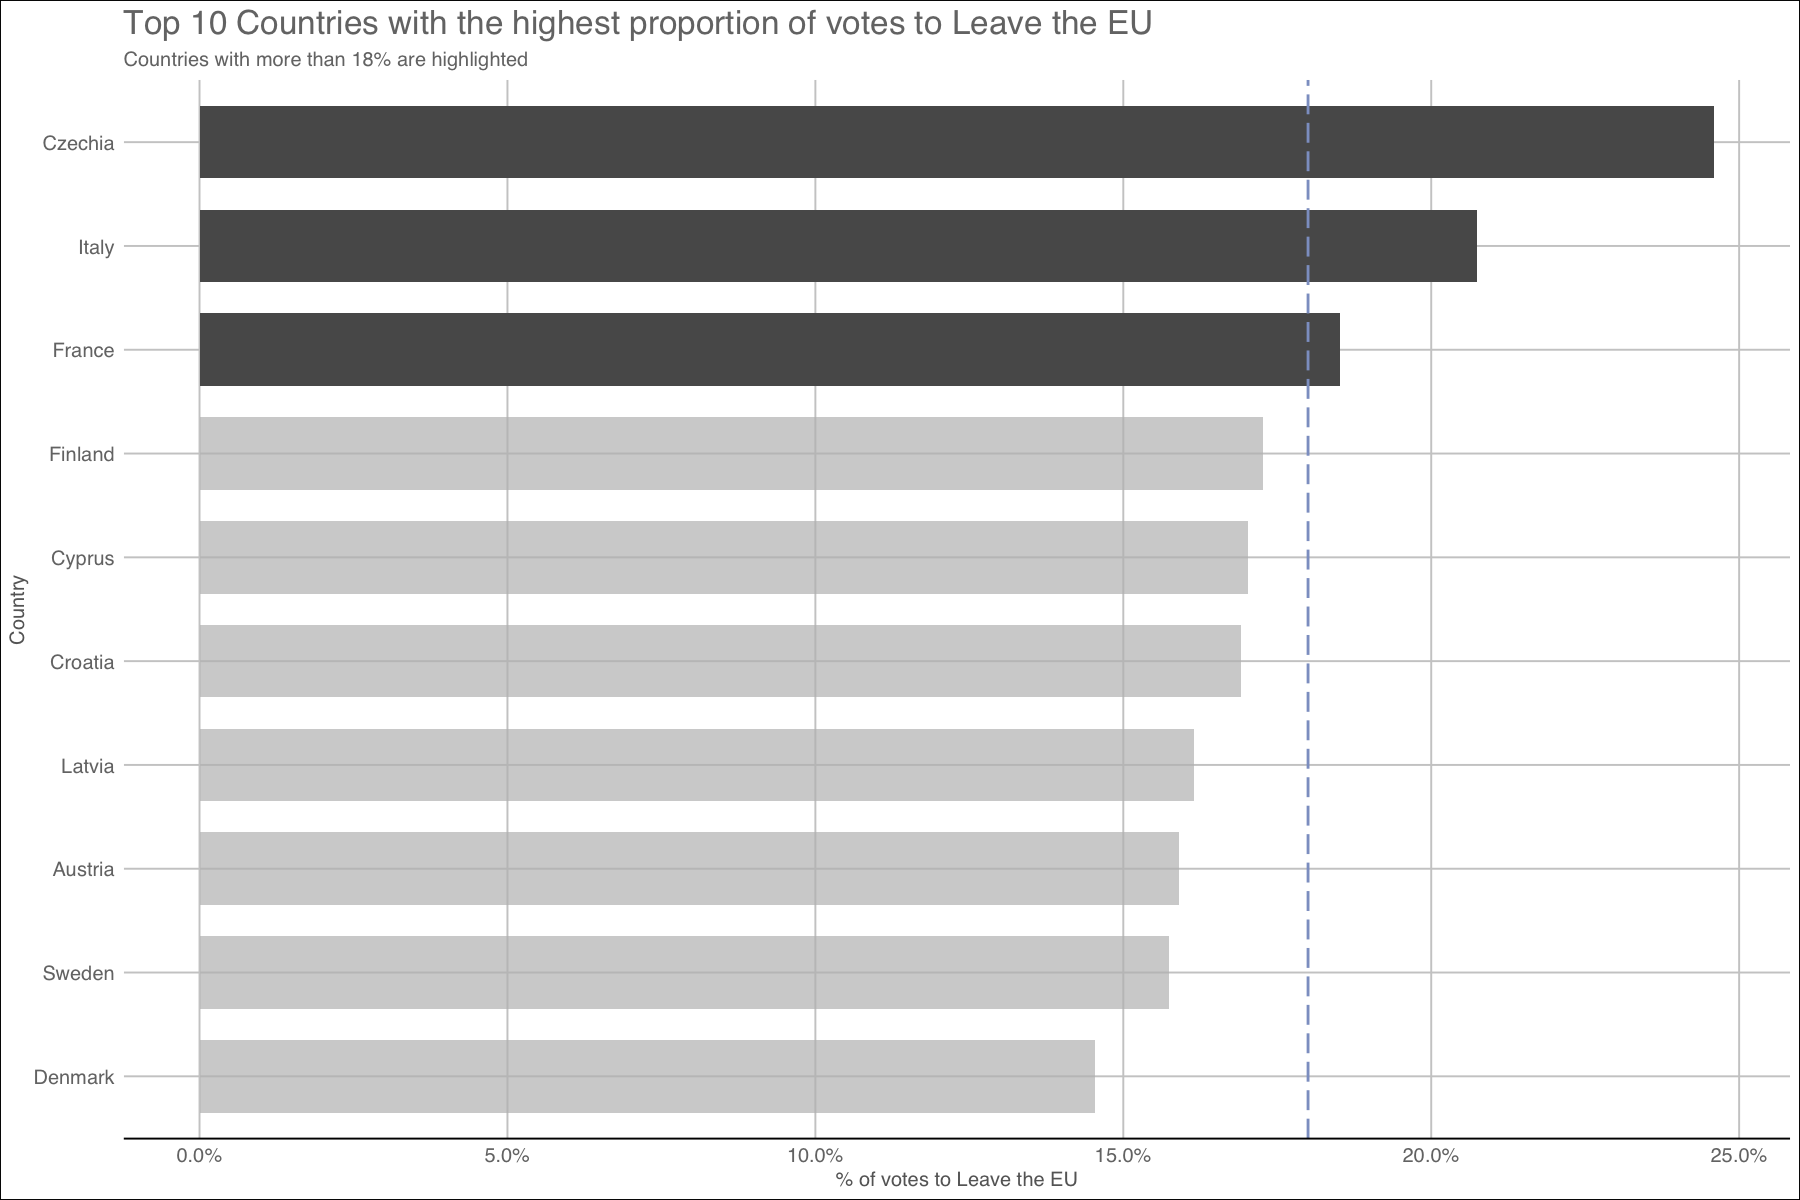

In [22]:
countries_by_Vote_Leave <- weighted_df_ess %>% group_by(cntry,vteurmmb) %>% 
    summarise(total = survey_total(), prop = survey_mean()) %>%
    filter(vteurmmb == "Leave") %>%
    arrange(desc(prop)) %>%
    head(10)


countries_by_Vote_Leave %>%
ggplot(aes(x=factor(cntry, levels = countries_by_Vote_Leave$cntry[order(prop)]), y=prop)) + 
    geom_bar(position="dodge",stat="identity", width = .7) +
    gghighlight(max(prop) > 0.18) +
    geom_hline(aes(yintercept = 0.18), colour = "#8da0cb", linetype ="longdash", size = .8) +
    scale_y_continuous(labels = scales::percent) +
    labs(x = "Country",
         y = "% of votes to Leave the EU",
         title = "Top 10 Countries with the highest proportion of votes to Leave the EU",
         subtitle = "Countries with more than 18% are highlighted") +
    theme_gdocs() + coord_flip()

In [23]:
target_countries <- countries_by_Vote_Leave %>% arrange(desc(prop)) %>% head(5) %>% select(cntry)

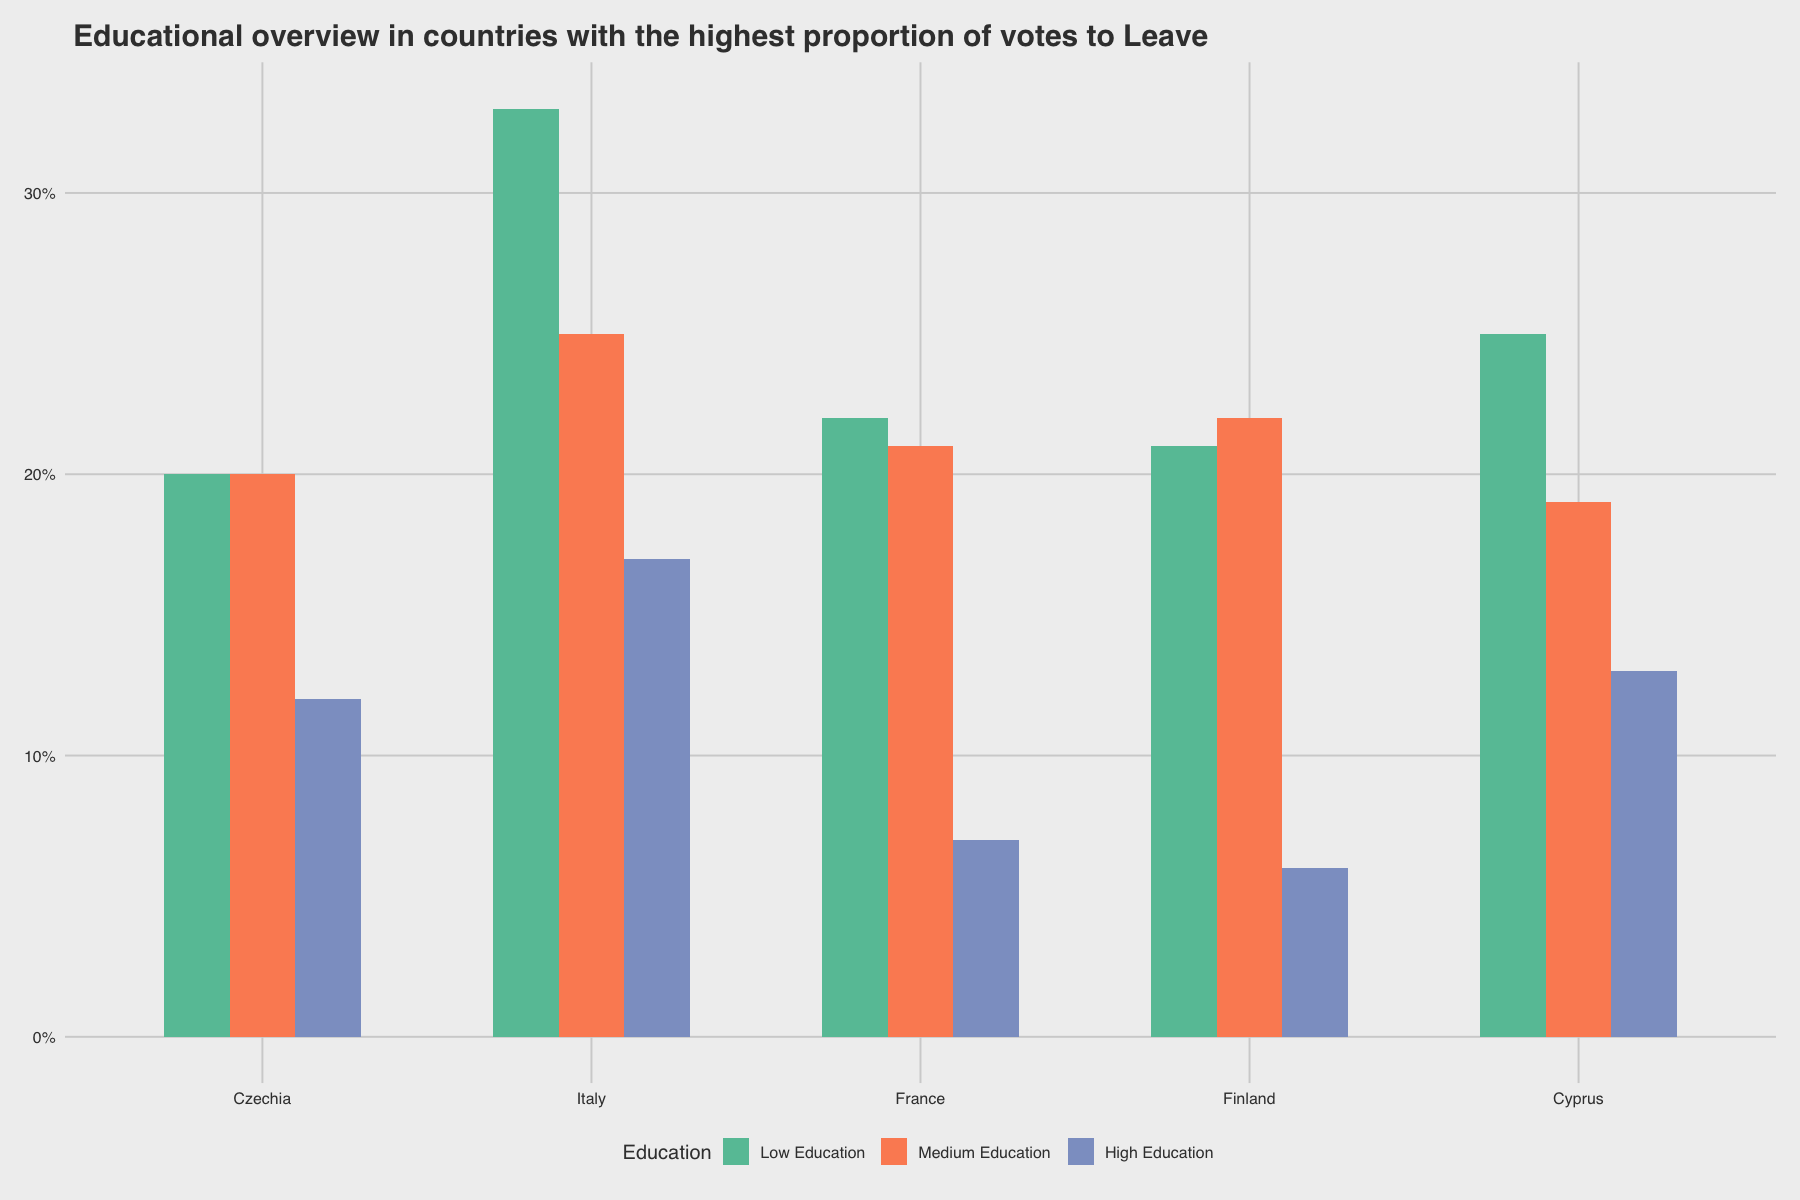

In [24]:
weighted_df_ess %>% group_by(cntry,Education,vteurmmb) %>%
    summarise(total = round(survey_total(),2), proportion = round(survey_mean(),2)) %>%
    filter(vteurmmb == "Leave", cntry %in% target_countries$cntry) %>% 
    arrange(desc(cntry,Education,proportion)) %>%
    ggplot(aes(x= factor(cntry, labels=target_countries$cntry), y=proportion)) + 
    geom_bar(aes(fill=factor(Education,levels=c("Low Education","Medium Education","High Education"))),
             position="dodge",stat="identity", width = .6) +
    scale_fill_brewer(palette='Set2') +
    scale_y_continuous(labels = scales::percent) +
    labs( x = "% of votes to Leave the EU",
        y = "Country",
        fill = "Education",
        title = " Educational overview in countries with the highest proportion of votes to Leave") + 
    theme_fivethirtyeight()

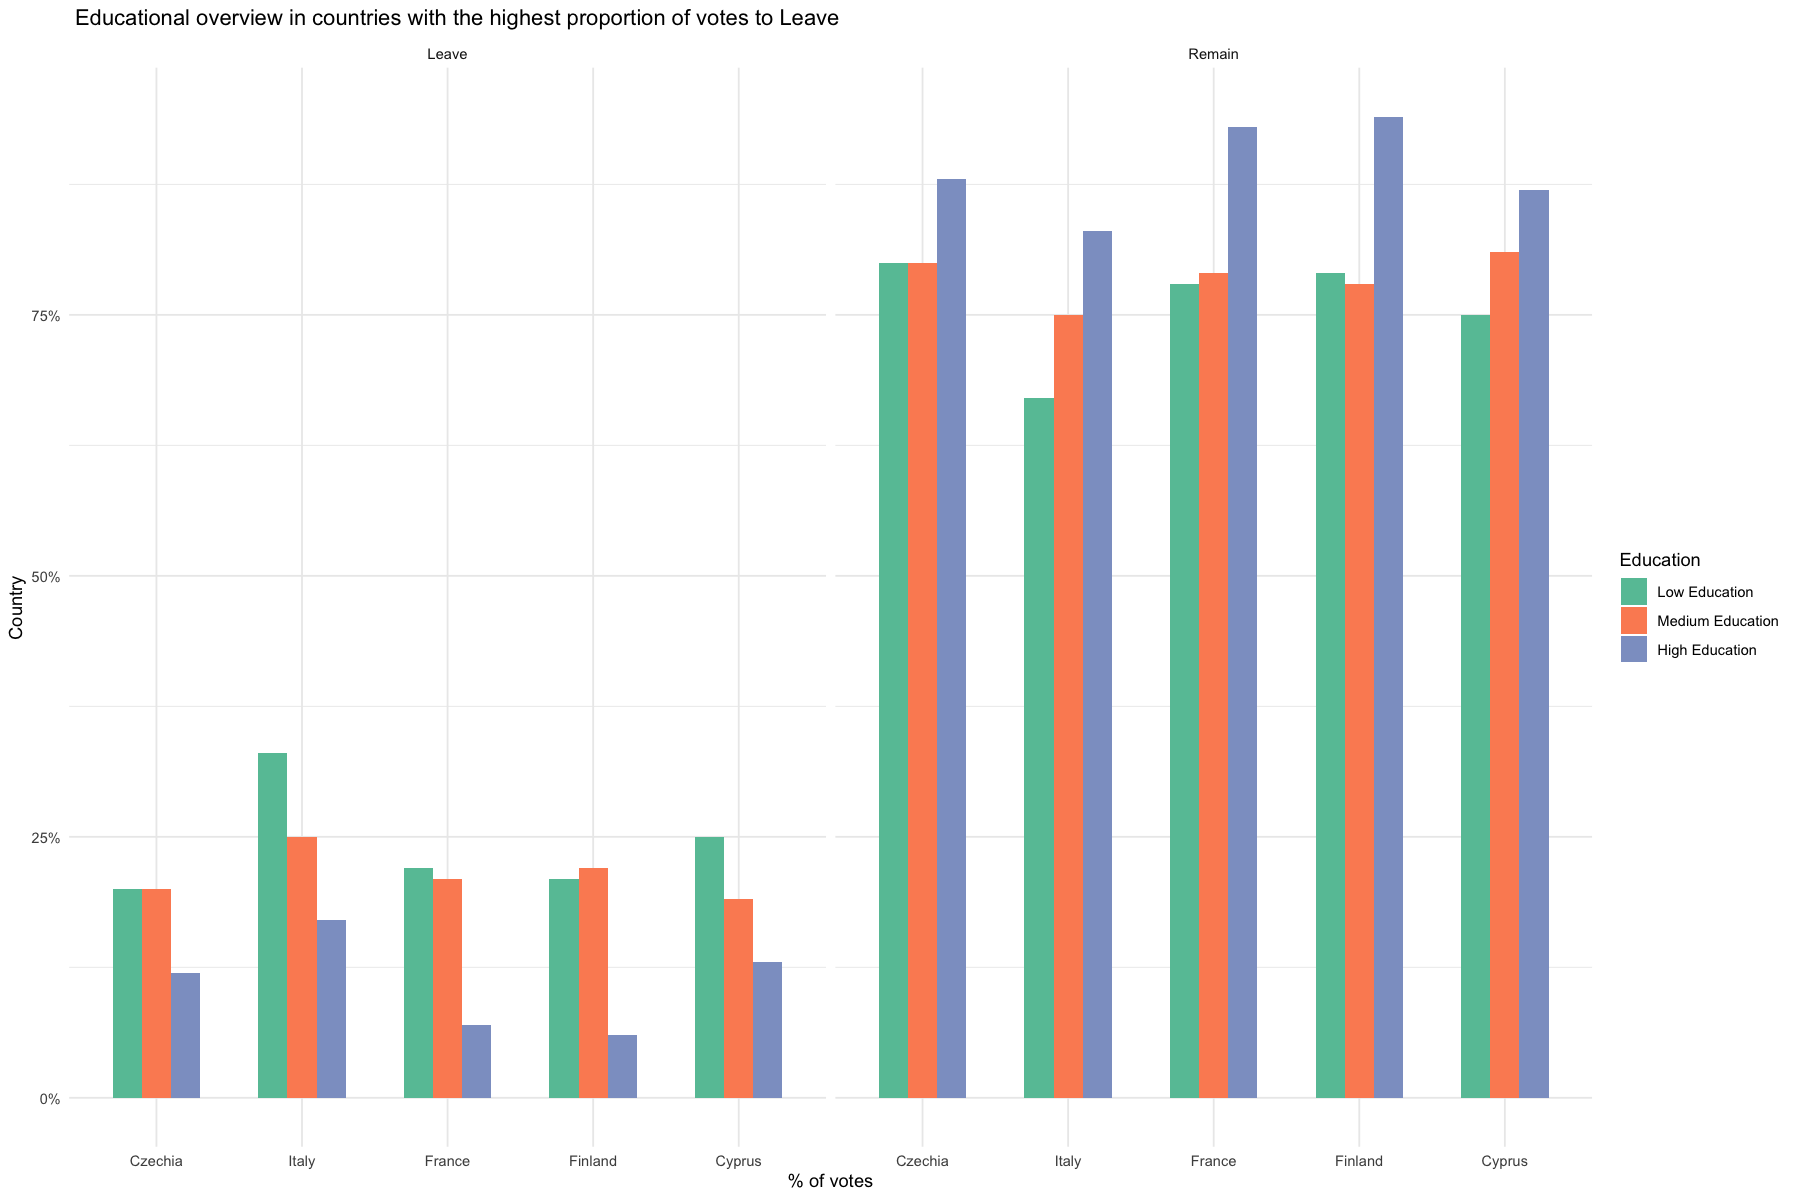

In [70]:
weighted_df_ess %>% group_by(cntry,Education,vteurmmb) %>%
    summarise(total = round(survey_total(),2), proportion = round(survey_mean(),2)) %>%
    filter(cntry %in% target_countries$cntry) %>% 
    arrange(desc(cntry,Education,proportion)) %>%
    ggplot(aes(x= factor(cntry, labels=target_countries$cntry), y=proportion)) + 
    geom_bar(aes(fill=factor(Education,levels=c("Low Education","Medium Education","High Education"))),
             position="dodge",stat="identity", width = .6) +
    facet_wrap(~ vteurmmb) +
    scale_fill_brewer(palette='Set2') +
    scale_y_continuous(labels = scales::percent) +
    labs( x = "% of votes",
        y = "Country",
        fill = "Education",
        title = " Educational overview in countries with the highest proportion of votes to Leave") + 
    theme_minimal()

In [ ]:
# TRY A STACKED BAR CHART -> FILL = VOTE instead of separating plots

Among those who voted for their country to Remain in EU the High Education it predominant as per Leave the EU Low Education is uppermost on almost all of Countries. It's worthwhile to investigate the relationship on them.

In [ ]:
weighted_df_ess %>%

ggplot(studentresult, aes(x=Grade, y=age, color=Subject)) + 
  geom_point() +
  geom_smooth(method = "lm", se=FALSE, fullrange=TRUE) +
  labs( x = "Total mark",
        y = "Age",
        color = "Subject",
        title = "Relation between Student's Age and Marks",
        subtitle = "Relationship break down by Subjects") + theme_gdocs()

### Age Band

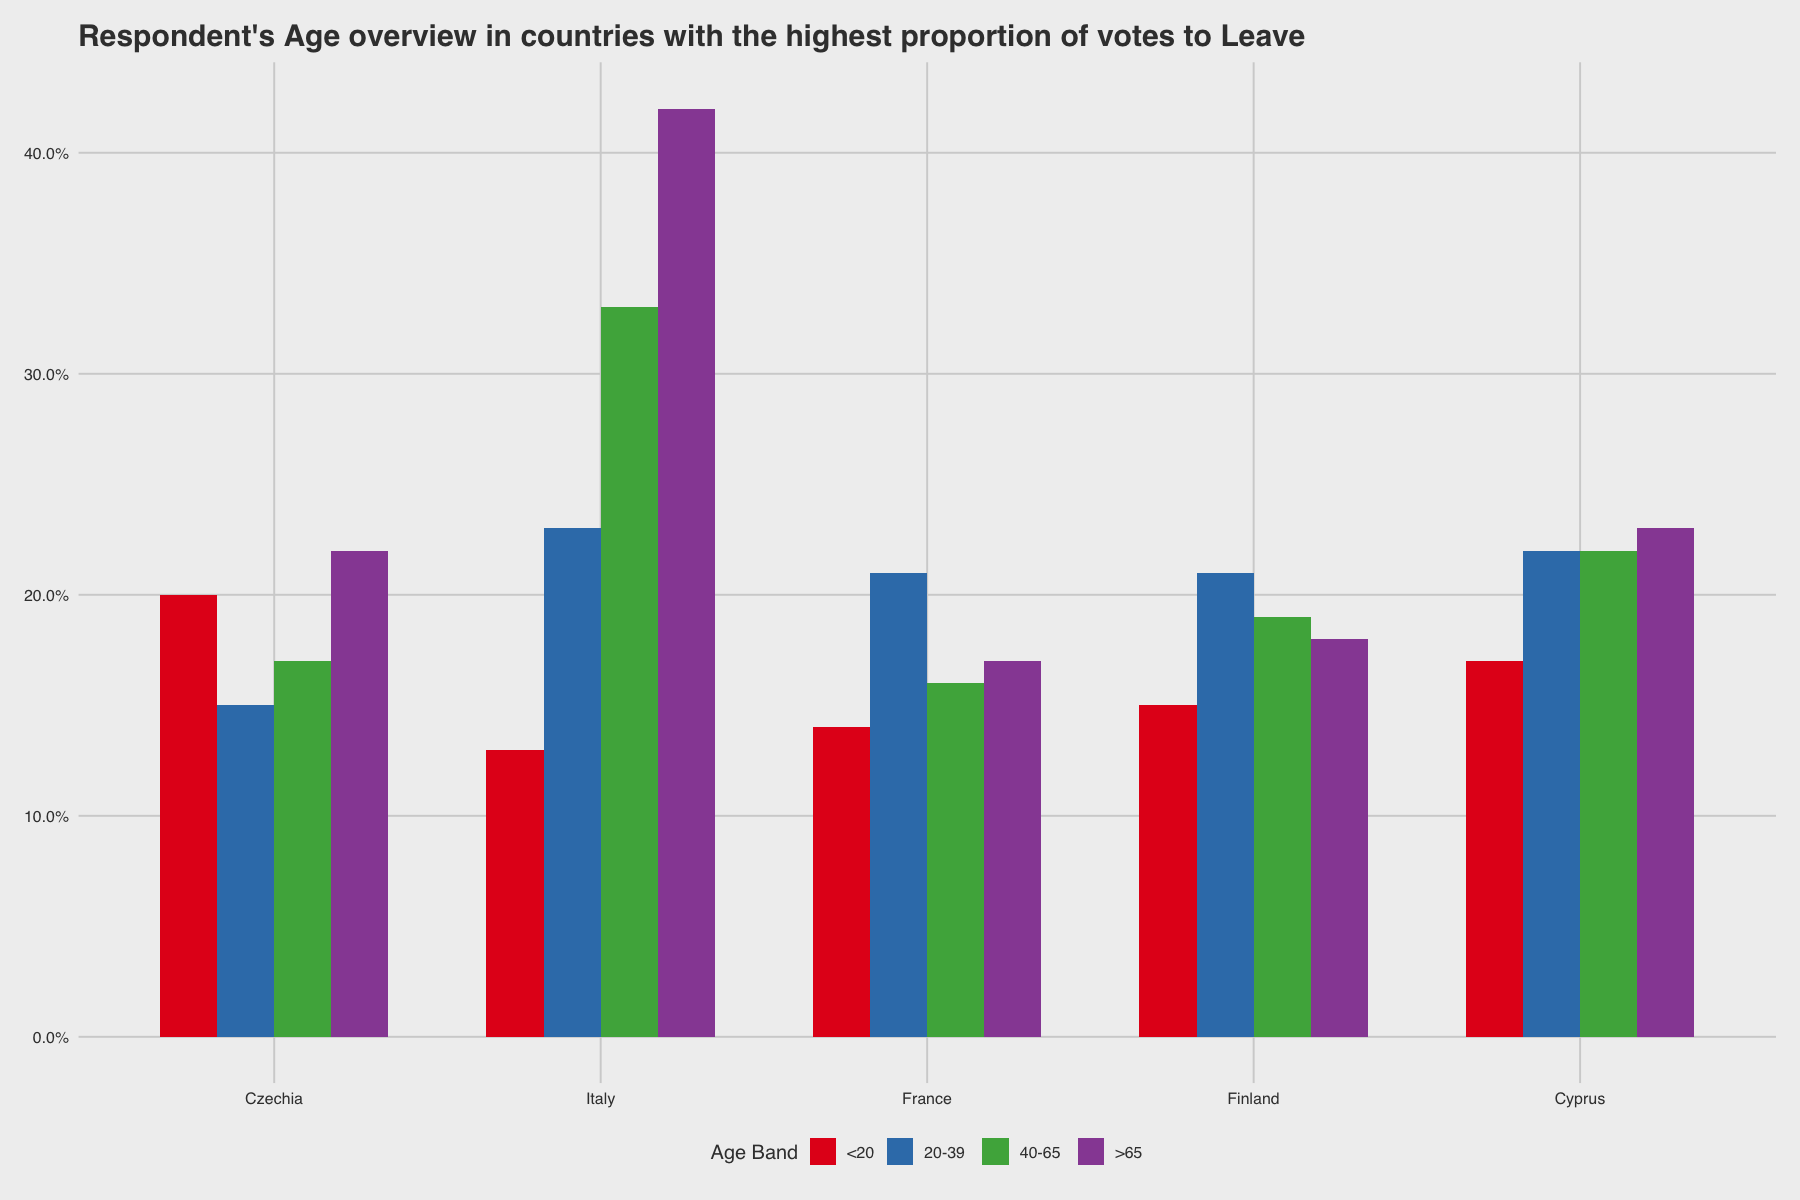

In [24]:
weighted_df_ess %>% filter(cntry %in% target_countries$cntry) %>% 
    group_by(cntry,Age_Band,vteurmmb) %>%
    summarise(total = round(survey_total(),2), proportion = round(survey_mean(),2)) %>%
    filter(vteurmmb == "Leave") %>%
    ggplot(aes(x= factor(cntry, labels=target_countries$cntry), y=proportion)) + 
    geom_bar(aes(fill=factor(Age_Band,levels=c("<20","20-39","40-65",">65"))),
             position="dodge",stat="identity", width = .7) +
    scale_fill_brewer(palette='Set1') +
    scale_y_continuous(labels = scales::percent) +
    labs( x = "% of votes to Leave the EU",
        y = "Country",
        fill = "Age Band",
        title = "Respondent's Age overview in countries with the highest proportion of votes to Leave") + 
    theme_fivethirtyeight()

### Unemployment

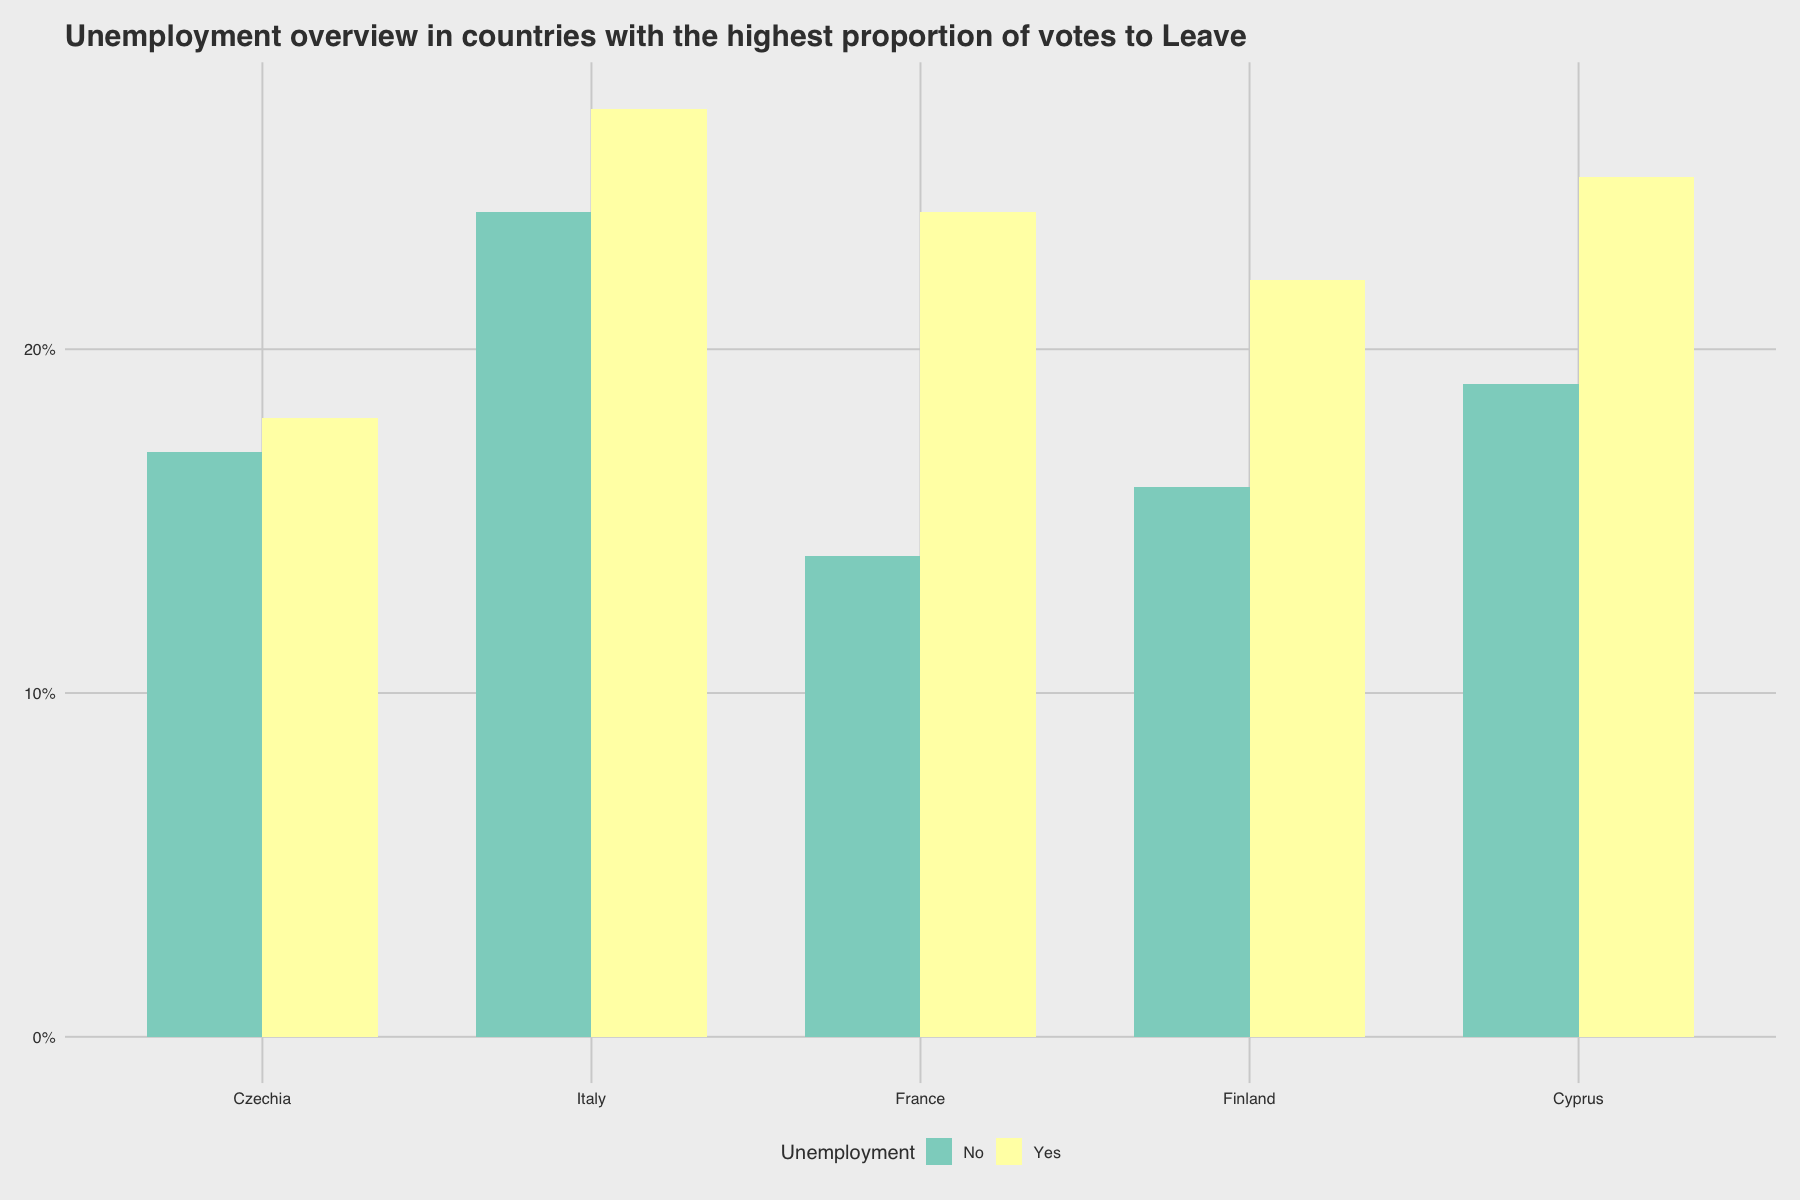

In [25]:
weighted_df_ess %>% filter(cntry %in% target_countries$cntry) %>% 
    group_by(cntry,uemp3m,vteurmmb) %>%
    summarise(total = round(survey_total(),2), proportion = round(survey_mean(),2)) %>%
    filter(vteurmmb == "Leave") %>%
    ggplot(aes(x= factor(cntry, labels=target_countries$cntry), y=proportion)) + 
    geom_bar(aes(fill=uemp3m),
             position="dodge",stat="identity", width = .7) +
    scale_fill_brewer(palette='Set3') +
    scale_y_continuous(labels = scales::percent) +
    labs( x = "% of votes to Leave the EU",
        y = "Country",
        fill = "Unemployment",
        title = "Unemployment overview in countries with the highest proportion of votes to Leave") + 
    theme_fivethirtyeight()

### Union membership

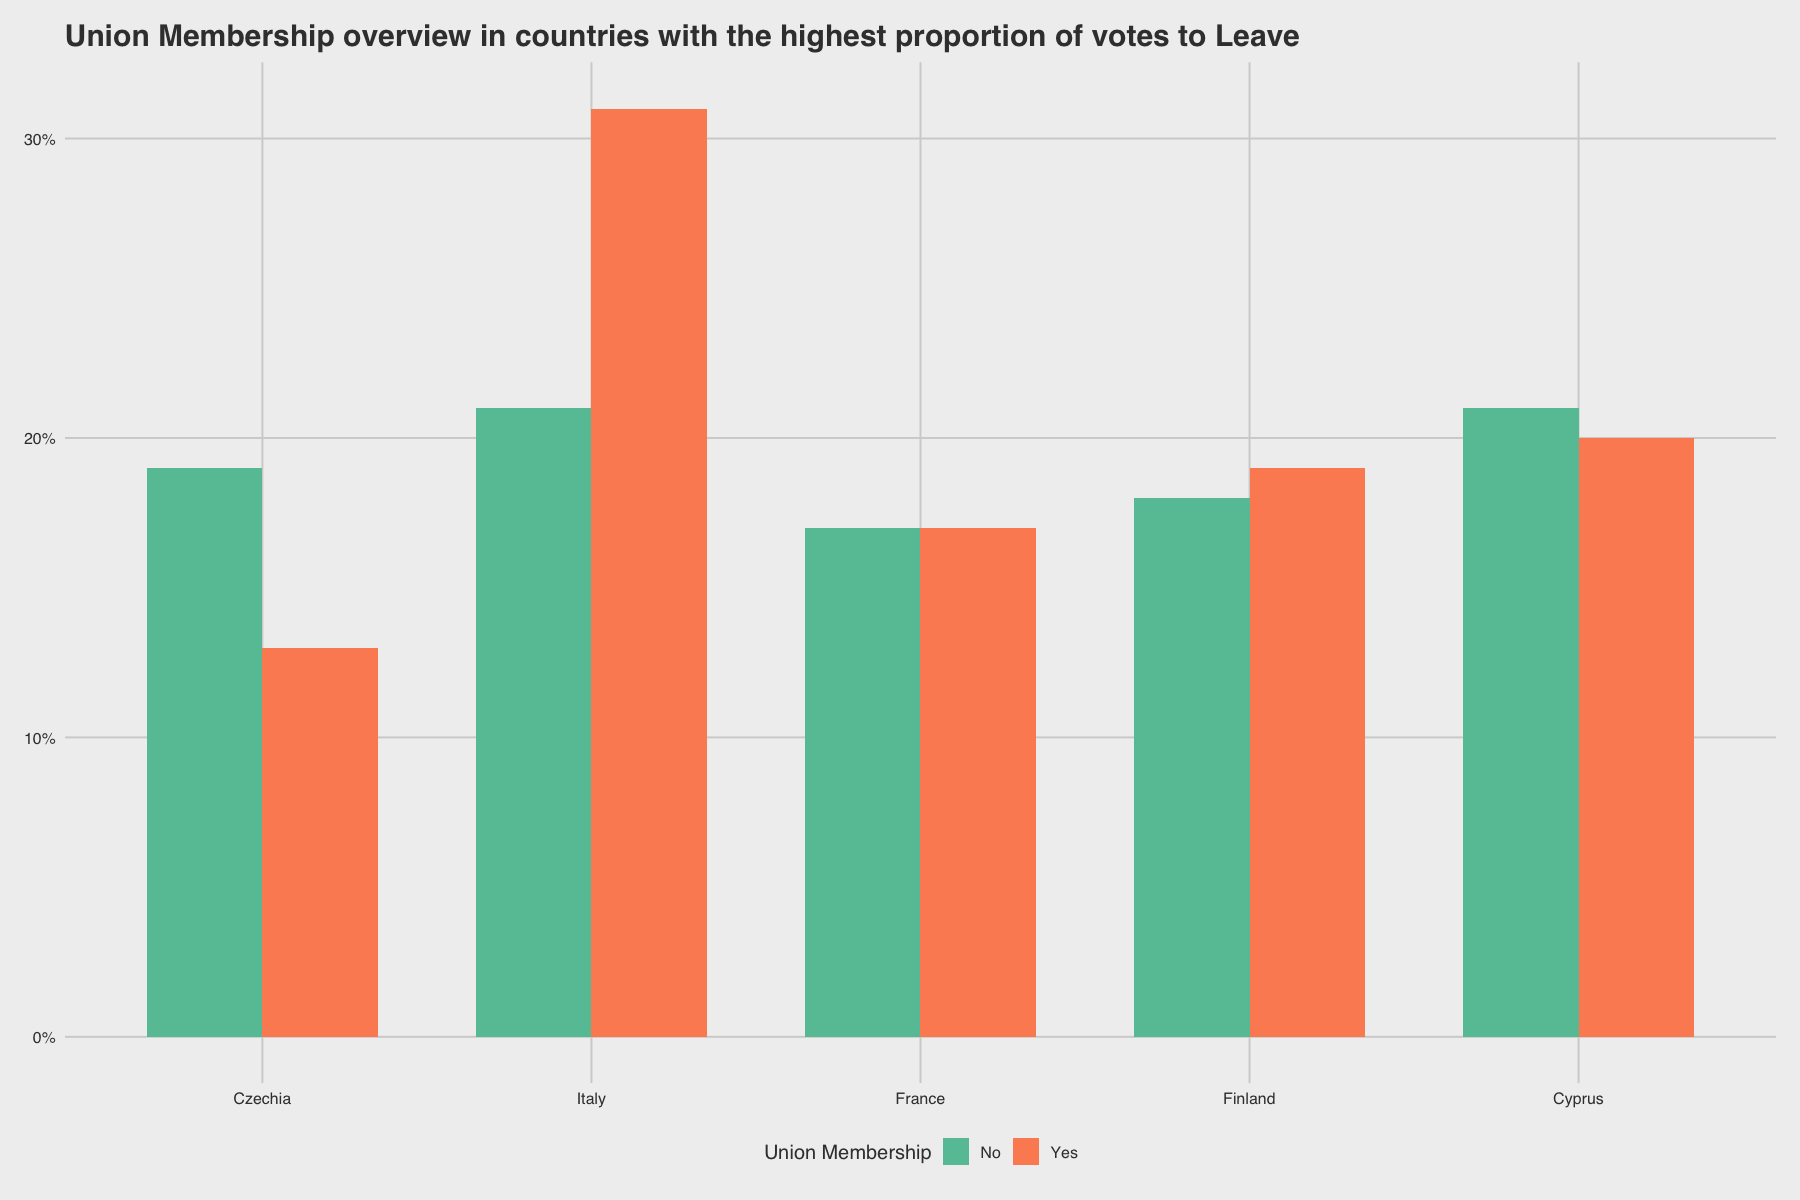

In [26]:
weighted_df_ess %>% filter(cntry %in% target_countries$cntry) %>% 
    group_by(cntry,mbtru,vteurmmb) %>%
    summarise(total = round(survey_total(),2), proportion = round(survey_mean(),2)) %>%
    filter(vteurmmb == "Leave") %>%
    ggplot(aes(x= factor(cntry, labels=target_countries$cntry), y=proportion)) + 
    geom_bar(aes(fill=mbtru),
             position="dodge",stat="identity", width = .7) +
    scale_fill_brewer(palette='Set2') +
    scale_y_continuous(labels = scales::percent) +
    labs( x = "% of votes to Leave the EU",
        y = "Country",
        fill = "Union Membership",
        title = "Union Membership overview in countries with the highest proportion of votes to Leave") + 
    theme_fivethirtyeight()

In [27]:
# round(prop.table(table(european_survey$Education)),2)
# round(prop.table(table(df_european_survey$netusoft)),2)
# round(prop.table(table(df_european_survey$vteurmmb)),2)
# round(prop.table(table(df_european_survey$uemp3m)),2)
# round(prop.table(table(df_european_survey$mbtru)),2)
# round(prop.table(table(df_european_survey$Age_Band)),2)

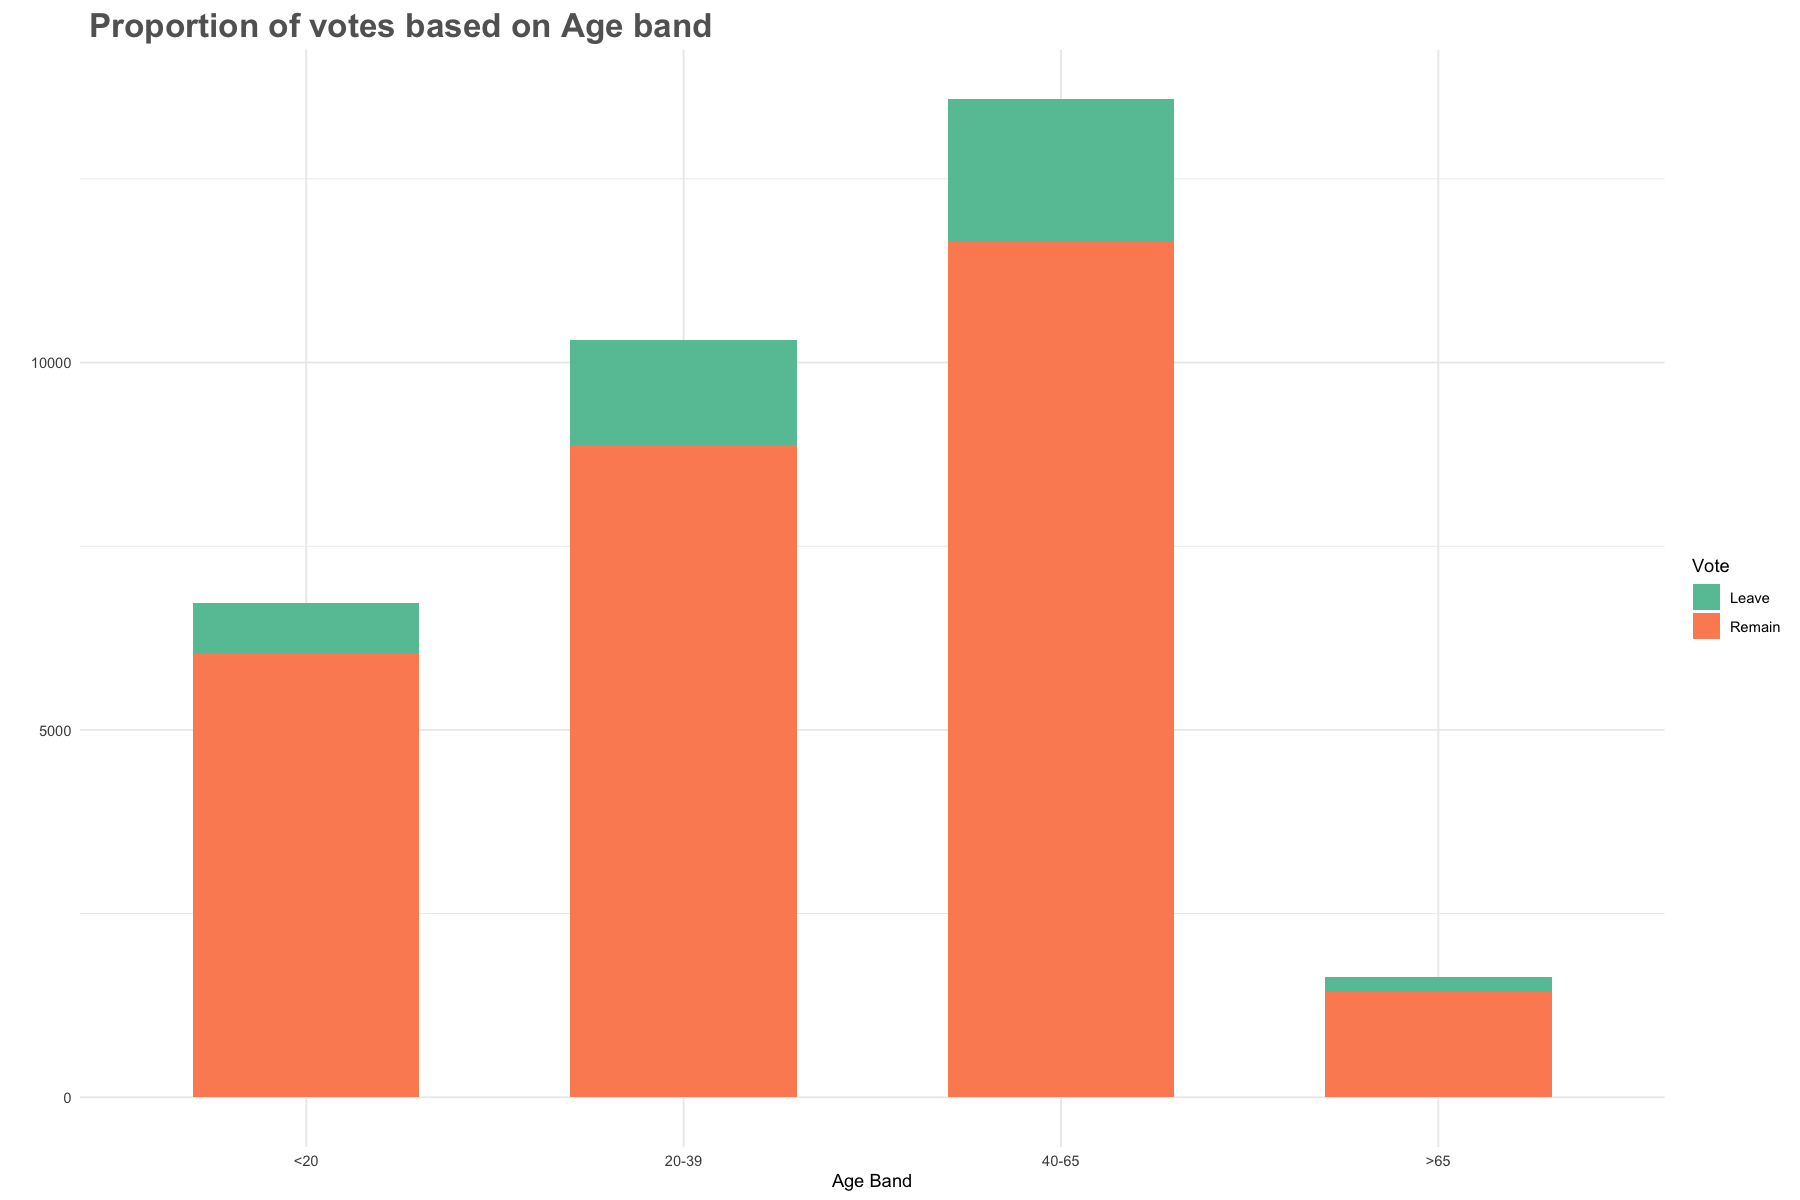

In [28]:
df_european_survey %>%
  mutate(Age_Band = factor(Age_Band, levels=c("<20", "20-39", "40-65", ">65"))) %>%
  ggplot(aes(x=Age_Band)) + 
  geom_bar(aes(fill=vteurmmb), stat="count", width = .6) +
  scale_fill_brewer(palette='Set2') +
  labs( x = "Age Band",
        y = "",
        fill = "Vote",
        title = " Proportion of votes based on Age band") + theme_minimal() +
  theme(plot.title=element_text(vjust=.5,family='', face='bold', colour='#636363', size=20))

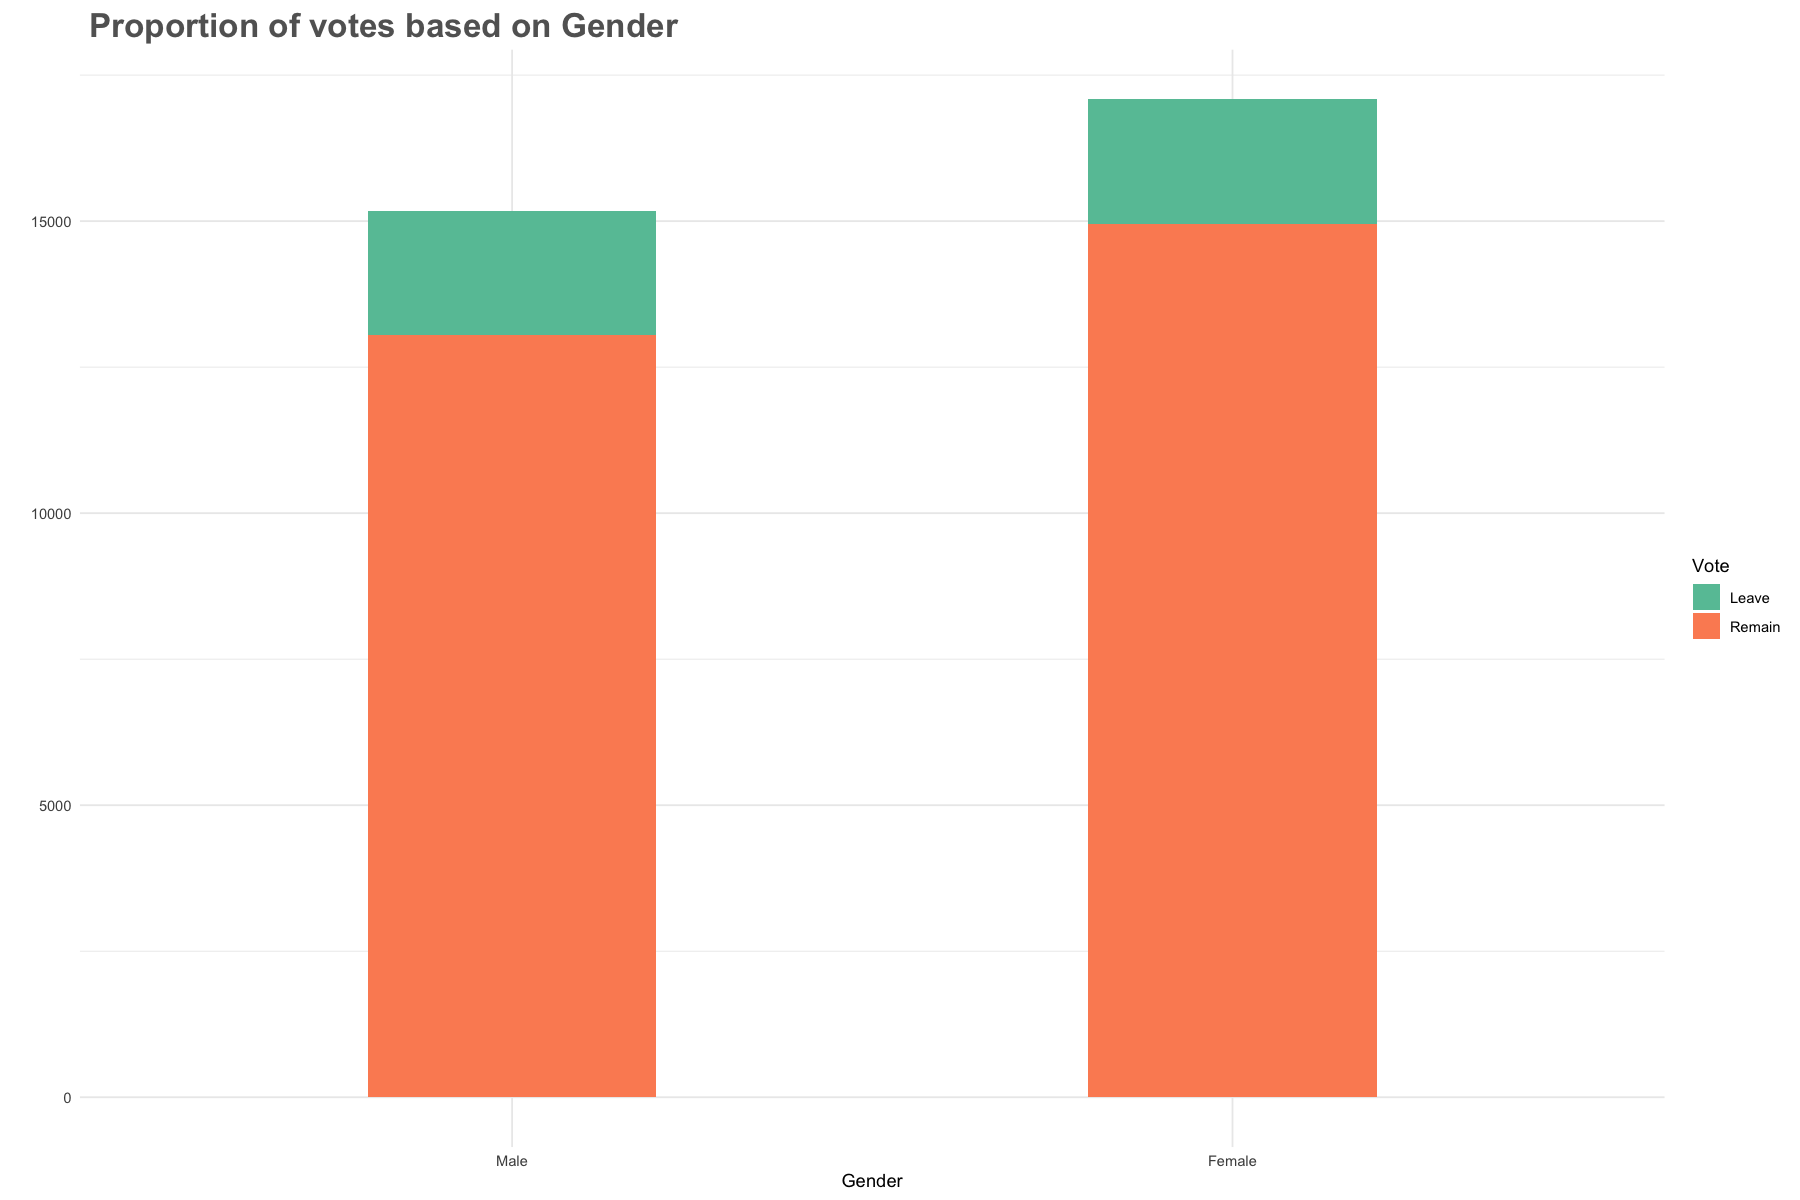

In [29]:
df_european_survey %>%
  ggplot(aes(x=gndr)) + 
  geom_bar(aes(fill=vteurmmb), stat="count", width = .4) +
  scale_fill_brewer(palette='Set2') +
  labs( x = "Gender",
        y = "",
        fill = "Vote",
        title = " Proportion of votes based on Gender") + theme_minimal() +
  theme(plot.title=element_text(vjust=.5,family='', face='bold', colour='#636363', size=20))

<a id="5"></a> <br>
<font size="+3" color="black"><b>5 - Previous Iterations</b></font><br><a id="5"></a>
<br> 

__Alternative for Proportion of votes__: Tried to a stacked bar graph but because Age <20 there is not much data it does not present well so I've switched Age and Vote

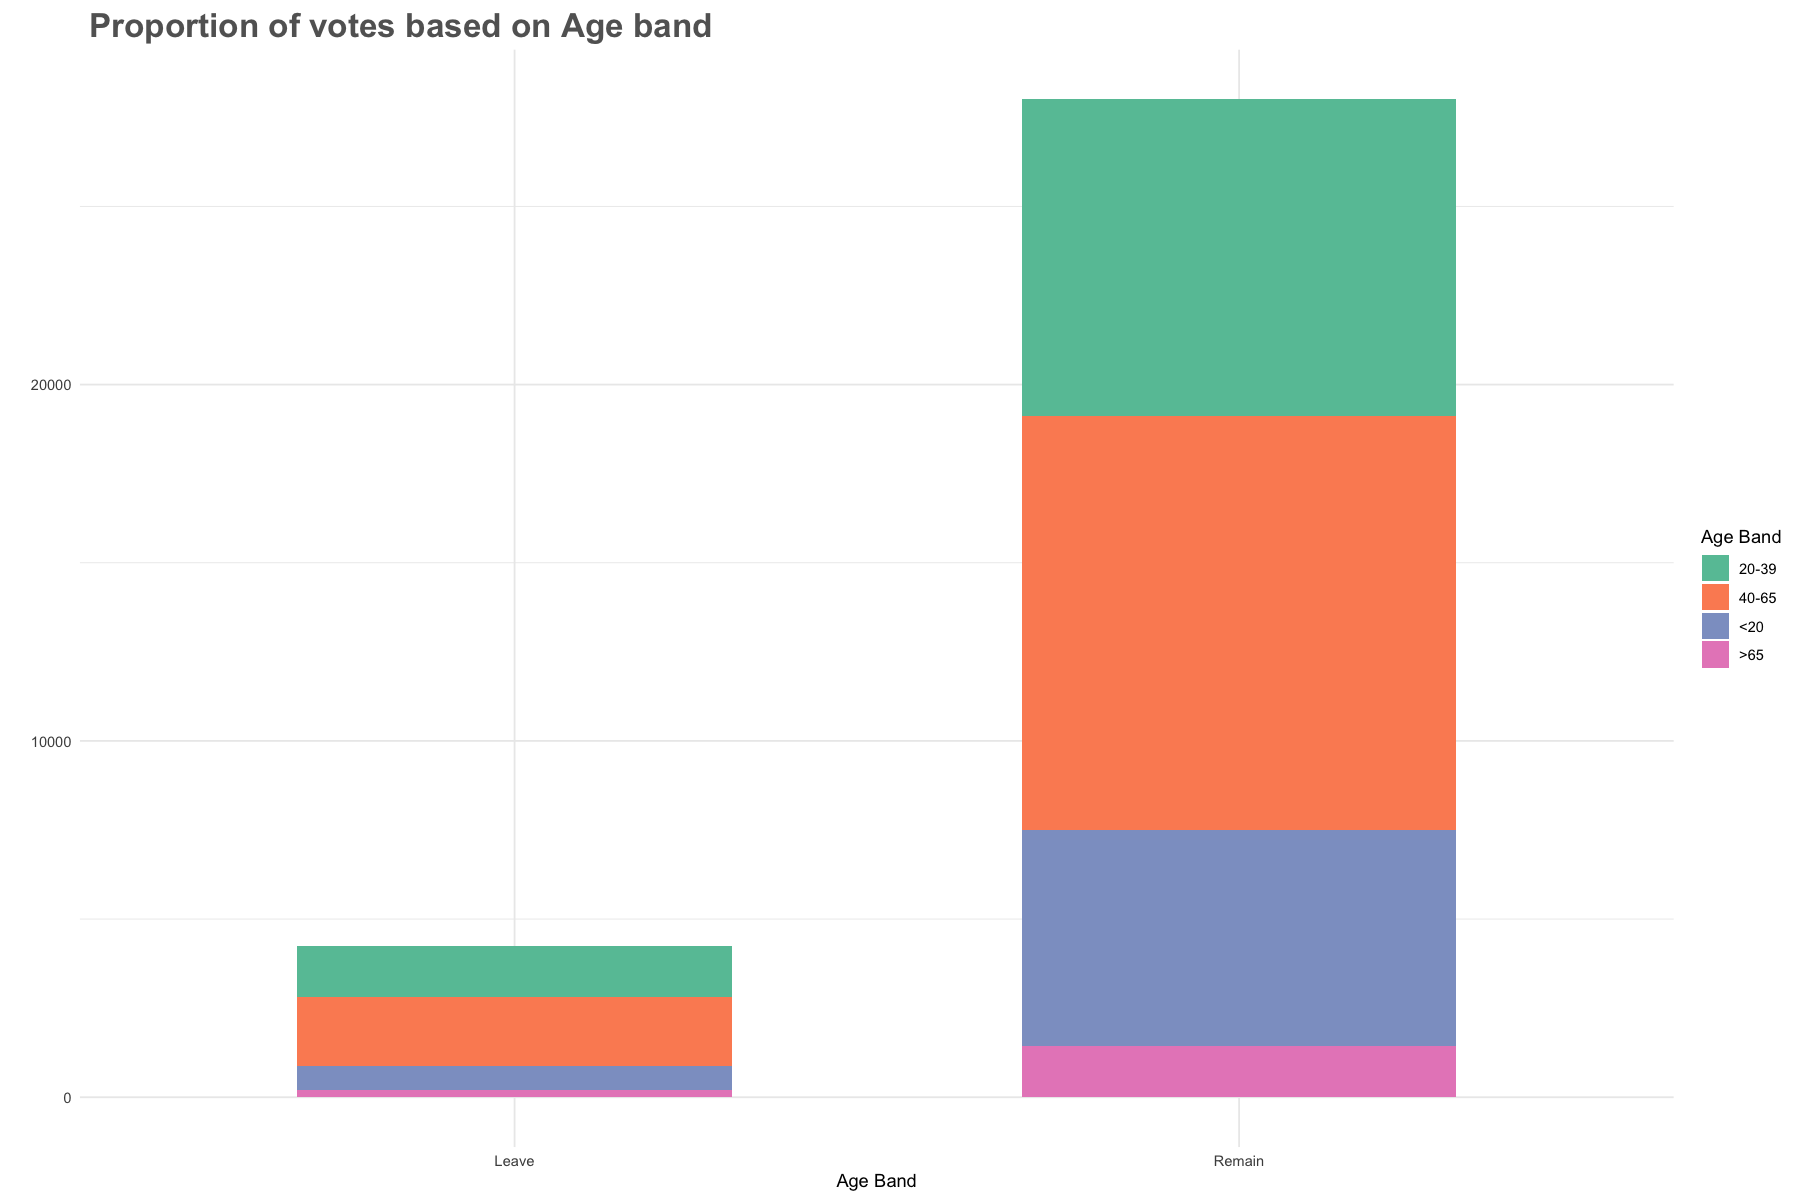

In [30]:
df_european_survey %>%
  ggplot(aes(x=vteurmmb)) + 
  geom_bar(aes(fill=Age_Band), stat="count", width = .6) +
  scale_fill_brewer(palette='Set2') +
  labs( x = "Age Band",
        y = "",
        fill = "Age Band",
        title = " Proportion of votes based on Age band") + theme_minimal() +
  theme(plot.title=element_text(vjust=.5,family='', face='bold', colour='#636363', size=20))

In [31]:
getRversion()

[1] ‘4.0.2’

In [ ]:
str(weighted_df_ess$variables)
lm_eduyears_vote <- svyglm(vteurmmb ~ eduyrs+Education+uemp3m+mbtru+agea+Age_Band+gndr, design=weighted_df_ess, family=binomial)
summary(lm_eduyears_vote, df.resid = degf(weighted_df_ess))
predict_european_survey <- weighted_df_ess

# Predictions
predict_european_survey$variables$probs <- predict(lm_eduyears_vote, 
                                                  newdata = predict_european_survey, 
                                                  type = "response")
# setting a significance
predict_european_survey <- predict_european_survey %>% mutate(evs1 = ifelse(probs > 0.9, yes = 1, no = 0))
predict_european_survey$variables$evs1 <- as.factor(predict_european_survey$variables$evs1)

summary(predict_european_survey$variables$evs1)

predict_european_survey$variables

# What's the probability for a person with 13 years of education, unemployed and 
# which have not been a trade union member to vote for the the country to leave the UE?
person1 <- predict(lm_eduyears_vote,
                   newdata = data.frame(eduyrs = 13, uemp3m = 'Yes', mbtru = 'No'),
                   type = "response")

paste0(round(person1*100,2), "%")

# Creating a plot to check hyphotesis 3
educational_profile <- data.frame(eduyrs = seq(from = 0, to = 50, by = .5))

educational_profile$predicted_probs <- predict(lm_eduyears_vote, 
                                              newdata = educational_profile, 
                                              type = "response")

# Plot: Vote for Years of Education
ggplot(educational_profile, 
       aes(x = eduyrs, y = predicted_probs)) + 
  geom_line(alpha = 0.5) + 
  ylab("Probability to vote for Leave the UE") + 
  xlab("Years of Education") + 
  ggtitle("Vote for Leave the UE by Years of Education")